<span style="color:red;  font-weight:bold; font-size:180%"> Coffee 인식을 위한 CNN 딥러닝</span> 

<span style="color:red;  font-weight:bold; font-size:180%"> ● 딥러닝을 위한 사전 준비 </span> 

<span style="color:blue;  font-weight:bold; font-size:160%"> 1) 라이브러리 임포트하기 </span> 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 전처리 과정 수행 
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import * 
#import cv2

Using TensorFlow backend.


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.font_manager 
import random
import pandas as pd

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

<span style="color:blue;  font-weight:bold; font-size:160%">  2) 이미지 데이터셋이 있는 디렉토리 연결 후, 파일명 기반으로 레이블링하기     </span> 

In [53]:
path = './coffee/training/'

In [54]:
path

'./coffee/training/'

In [55]:
filenames = os.listdir(path)
print("●len(filenames) :", len(filenames)) 
print(filenames) 

●len(filenames) : 450
['normal_coffee (1).jpg', 'normal_coffee (10).jpg', 'normal_coffee (100).jpg', 'normal_coffee (101).jpg', 'normal_coffee (102).jpg', 'normal_coffee (103).jpg', 'normal_coffee (104).jpg', 'normal_coffee (105).jpg', 'normal_coffee (106).jpg', 'normal_coffee (107).jpg', 'normal_coffee (108).jpg', 'normal_coffee (109).jpg', 'normal_coffee (11).jpg', 'normal_coffee (110).jpg', 'normal_coffee (111).jpg', 'normal_coffee (112).jpg', 'normal_coffee (113).jpg', 'normal_coffee (114).jpg', 'normal_coffee (115).jpg', 'normal_coffee (116).jpg', 'normal_coffee (117).jpg', 'normal_coffee (118).jpg', 'normal_coffee (119).jpg', 'normal_coffee (12).jpg', 'normal_coffee (120).jpg', 'normal_coffee (121).jpg', 'normal_coffee (122).jpg', 'normal_coffee (123).jpg', 'normal_coffee (124).jpg', 'normal_coffee (125).jpg', 'normal_coffee (126).jpg', 'normal_coffee (127).jpg', 'normal_coffee (128).jpg', 'normal_coffee (129).jpg', 'normal_coffee (13).jpg', 'normal_coffee (130).jpg', 'normal_cof

In [56]:
filenames[0].split(" ")

['normal_coffee', '(1).jpg']

In [57]:
categories=[]
for filename in filenames:
    #print(filename)
    category=filename.split(" ")[0]
    if category =="normal_coffee":
        categories.append(0)
    else:
        categories.append(1)   

In [58]:
len(categories)

450

In [59]:
print(categories)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
df=pd.DataFrame({"filename":filenames,  "label":categories}) 

In [61]:
df

,filename,label
0,normal_coffee (1).jpg,0
1,normal_coffee (10).jpg,0
2,normal_coffee (100).jpg,0
3,normal_coffee (101).jpg,0
4,normal_coffee (102).jpg,0
...,...,...
445,spilled_coffee (50).jpg,1
446,spilled_coffee (6).jpg,1
447,spilled_coffee (7).jpg,1
448,spilled_coffee (8).jpg,1


In [62]:
print(df.filename)
print("-"*50)
print(df.label)

0        normal_coffee (1).jpg
1       normal_coffee (10).jpg
2      normal_coffee (100).jpg
3      normal_coffee (101).jpg
4      normal_coffee (102).jpg
                ...           
445    spilled_coffee (50).jpg
446     spilled_coffee (6).jpg
447     spilled_coffee (7).jpg
448     spilled_coffee (8).jpg
449     spilled_coffee (9).jpg
Name: filename, Length: 450, dtype: object
--------------------------------------------------
0      0
1      0
2      0
3      0
4      0
      ..
445    1
446    1
447    1
448    1
449    1
Name: label, Length: 450, dtype: int64


<span style="color:blue;  font-weight:bold; font-size:160%">  3) 준비된 이미지 분포 확인하기     </span> 

### 한글 폰트 준비 

In [63]:
font_path = "C:\\Windows\\Fonts\\gulim.ttc"  # 한글 폰트 셋팅
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=6) 

<IPython.core.display.Javascript object>


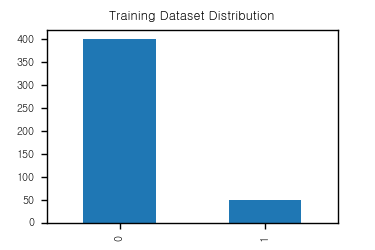

Text(0.5, 1.0, 'Training Dataset Distribution')

In [64]:
%matplotlib notebook
plt.figure(figsize=(3,2))
df['label'].value_counts().plot.bar()
plt.title('Training Dataset Distribution') 
#plt.title('트레이닝 데이터셋 분포') 

<span style="color:blue;  font-weight:bold; font-size:160%">  4) 준비된 이미지 랜덤으로 선택하여 시각화해보기   </span> 

In [74]:
#print(filenames)
print(type(filenames))
sample = random.choice(filenames)  #random.choice()함수는 리스트에서 임의의 요소를 선택
print(sample)

<class 'list'>
normal_coffee (340).jpg


In [75]:
image = load_img(path+sample)

<IPython.core.display.Javascript object>


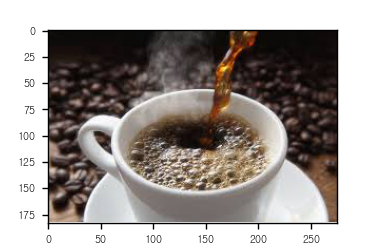

In [76]:
plt.figure(figsize=(3,2))
plt.imshow(image)

<span style="color:red;  font-weight:bold; font-size:180%">  ●  딥러닝  시작 </span> 

<span style="color:blue;  font-weight:bold; font-size:160%">  1) 이미지 사이즈 128x128 균일화하기   </span> 

In [77]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)  
IMAGE_CHANNEL=3  #컬러 

<span style="color:blue;  font-weight:bold; font-size:160%">  2) 레이블링 결과를 0 or 1 에서 스트링 형태로 변형하기  </span> 

In [78]:
df['label'] # 현재 레이블링 결과는 0 or 1

0      0
1      0
2      0
3      0
4      0
      ..
445    1
446    1
447    1
448    1
449    1
Name: label, Length: 450, dtype: int64

In [79]:
df['label']=df['label'].replace({0:'normal',1:"spilled"})  

In [81]:
df

,filename,label
0,normal_coffee (1).jpg,normal
1,normal_coffee (10).jpg,normal
2,normal_coffee (100).jpg,normal
3,normal_coffee (101).jpg,normal
4,normal_coffee (102).jpg,normal
...,...,...
445,spilled_coffee (50).jpg,spilled
446,spilled_coffee (6).jpg,spilled
447,spilled_coffee (7).jpg,spilled
448,spilled_coffee (8).jpg,spilled


<span style="color:blue;  font-weight:bold; font-size:160%">  3) Tensorboard 출력을 위한 딥러닝 모델링 </span>  

<참고>  
"학습하는 과정 자체를 전체적으로 안정화"하여 학습 속도를 가속 시킬 수 있는 근본적인 방법인  
"배치 정규화(Batch Normalization)"를 사용하는 것이 좋다.  


● 배치정규화(Batch Normalization)  
신경망 입력 데이터를 평균 : 0 , 분산: 1로 정규화를 해서 학습이 잘 이루어지도록 하는 방법  
학습시 배치를 한 단위로 정규화를 한다.  

먼저 Input으로 사용된 배치의 평균과 분산을 계산을 한다.  
그 다음 hidden layer의 활성화값/출력값에 대해서 평균이 0, 분산이 1이 되도록 정규화(Normalization)를 한다.   
그럼으로써 데이터 분포가 덜 치우치게 되고 배치 정규화 단계마다 확대scale와 이동shift 변환(transform)을 수행한다.  


In [143]:
# Layer 1
model = tf.keras.models.Sequential([ 
tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),

# Layer 2 
tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),

# Layer 3
tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
          
# Fully Connected 
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Dense(2,activation="softmax")])  

<span style="color:blue;  font-weight:bold; font-size:160%">  4) 딥러닝 모델 컴파일 </span> 

<참고>  
● 케라스에서 binary_crossentropy와 categorical_crossentropy의 차이

● binary_crossentropy  
최종 출력 비트가 딱 1개로 구성된 경우 사용한다.   
가령, 최종 출력 값이 딱 1개의 비트로 구성된  [0] or [1] 이면서  
sigmoid_cross_entropy를 loss로 하고자 할 때는 binary_crossentropy를 사용한다.  

● categorical_crossentropy  
최종 출력 비트가 2개 이상으로 구성된 경우 사용한다.  
가령, 최종 출력 값이  [0,1] or [1,0] 의 원-핫인코딩 형태이면서  
softmax_cross_entropy를 loss로 하고자 할 때는 categorical_crossentropy를 사용한다. 

In [145]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

<span style="color:blue;  font-weight:bold; font-size:160%">  5) 콜백 함수를 활용한 딥러닝 옵션 추가하기 </span> 

# 5.1) TensorBoard 결과를 기록할 로그 디렉토리 생성

In [84]:
import tensorboard

In [85]:
from datetime import datetime

In [86]:
datetime.now()

datetime.datetime(2021, 7, 7, 11, 41, 54, 820331)

In [87]:
datetime.now().strftime("%Y%m%d-%H%M%S") 

'20210707-114206'

In [88]:
logdir="logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S") # 현재 날짜 및 시각으로 디렉토리 이름으로 로그 디렉토리 생성 

In [89]:
logdir

'logs\\20210707-114222'

In [90]:
import os

In [91]:
os.getcwd()

'C:\\ai\\CNN_CATS_AND_DOGS'

### ModelCheckpoint( ) 함수를 이용하여 지정된 폴더에 모델 업데이트 과정을 저장을 위한 부분 

In [92]:
# epoch마다 딥러닝 모델을 저장할 폴더 만들기
MODEL_DIR = './coffee_model_save/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [93]:
modelpath="./coffee_model_save/{epoch:02d}-{loss:.4f}.hdf5"  

In [94]:
modelpath

'./coffee_model_save/{epoch:02d}-{loss:.4f}.hdf5'

In [95]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_weights_only=True, 
                               verbose=1, save_best_only=True)

# 5.2) 콜백 함수 활용

In [96]:
#텐서보드 콜백함수 사용 예시 

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [97]:
#EarlyStopping 콜백함수 사용 예시 

earlystop = EarlyStopping(patience=10)

<참고>   
ReduceLROnPlateau()함순 learning rate(학습률)이 개선되지 않을 때, 아래의 예시와 같이 learning rate(학습률)을 동적으로 조정할 수 있다.  

예시)   
learning_rate_reduction=ReduceLROnPlateau(  
monitor= 'val_loss',<span style="color:blue;  font-weight:bold; font-size:100%"> #'val_loss'를 모니터링하면서</span>     
patience = 2,<span style="color:blue;  font-weight:bold; font-size:100%"> #2회 이상 val_loss가 줄어들지 않으면</span>   
factor = 0.5,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate을 1/2로 줄인다.</span>    
min_lr=0.0001,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate의 하한선 0.0001로 지정 </span>  
verbose=1)  

In [98]:
# ReduceLROnPlateau 콜백함수 사용 예시 

learning_rate_reduction=ReduceLROnPlateau(
                        monitor= 'val_loss', #'val_loss'를 모니터링하면서
                        patience = 2, #2회 이상 val_loss가 줄어들지 않으면
                        factor = 0.5, #learning rate을 1/2로 줄인다.
                        min_lr=0.0001, #learning rate의 하한선 0.0001로 지정
                        verbose=1)

In [99]:
callbacks = [tensorboard_callback, checkpointer, earlystop, learning_rate_reduction]  #케라스에서 제공하는 콜백함수 사용

In [100]:
callbacks

<span style="color:blue;  font-weight:bold; font-size:160%">  6) 준비된 training 데이터셋을 학습용 데이터셋과 검증용 데이터셋으로 분리하기  </span> 

## ● 판다스 기반의 데이터셋을 랜덤으로 분리 ( 80% : 학습용,  20% : 검증용 )

In [101]:
df

,filename,label
0,normal_coffee (1).jpg,normal
1,normal_coffee (10).jpg,normal
2,normal_coffee (100).jpg,normal
3,normal_coffee (101).jpg,normal
4,normal_coffee (102).jpg,normal
...,...,...
445,spilled_coffee (50).jpg,spilled
446,spilled_coffee (6).jpg,spilled
447,spilled_coffee (7).jpg,spilled
448,spilled_coffee (8).jpg,spilled


In [102]:
train_df, validate_df = train_test_split(df , test_size=0.2, random_state= 42)

In [103]:
train_df

,filename,label
24,normal_coffee (120).jpg,normal
17,normal_coffee (114).jpg,normal
66,normal_coffee (159).jpg,normal
148,normal_coffee (232).jpg,normal
249,normal_coffee (323).jpg,normal
...,...,...
106,normal_coffee (195).jpg,normal
270,normal_coffee (342).jpg,normal
348,normal_coffee (52).jpg,normal
435,spilled_coffee (41).jpg,spilled


In [104]:
validate_df

,filename,label
407,spilled_coffee (16).jpg,spilled
444,spilled_coffee (5).jpg,spilled
117,normal_coffee (204).jpg,normal
30,normal_coffee (126).jpg,normal
415,spilled_coffee (23).jpg,spilled
...,...,...
377,normal_coffee (79).jpg,normal
371,normal_coffee (73).jpg,normal
312,normal_coffee (380).jpg,normal
57,normal_coffee (150).jpg,normal


## ● 좌측에 인덱스 번호 추가해서 출력해보기  

In [105]:
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [106]:
train_df

,filename,label
0,normal_coffee (120).jpg,normal
1,normal_coffee (114).jpg,normal
2,normal_coffee (159).jpg,normal
3,normal_coffee (232).jpg,normal
4,normal_coffee (323).jpg,normal
...,...,...
355,normal_coffee (195).jpg,normal
356,normal_coffee (342).jpg,normal
357,normal_coffee (52).jpg,normal
358,spilled_coffee (41).jpg,spilled


In [107]:
validate_df

,filename,label
0,spilled_coffee (16).jpg,spilled
1,spilled_coffee (5).jpg,spilled
2,normal_coffee (204).jpg,normal
3,normal_coffee (126).jpg,normal
4,spilled_coffee (23).jpg,spilled
...,...,...
85,normal_coffee (79).jpg,normal
86,normal_coffee (73).jpg,normal
87,normal_coffee (380).jpg,normal
88,normal_coffee (150).jpg,normal


## ● 학습용 및 검증용 데이터 전체 검토하기 

In [108]:
print("전체 이미지 데이터 개수 : ", len(df))
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
print("검증용 전체 이미지 데이터 개수 : ", len(validate_df))

전체 이미지 데이터 개수 :  450
학습용 전체 이미지 데이터 개수 :  360
검증용 전체 이미지 데이터 개수 :  90


In [109]:
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
train_df['label'].value_counts()

학습용 전체 이미지 데이터 개수 :  360


normal     322
spilled     38
Name: label, dtype: int64

In [110]:
print("검증용 전체 이미지 데이터 개수 : ", len(validate_df))
validate_df['label'].value_counts()

검증용 전체 이미지 데이터 개수 :  90


normal     78
spilled    12
Name: label, dtype: int64

<span style="color:blue;  font-weight:bold; font-size:160%">  7) 이미지 재생성하여 데이터셋 증식하기 </span> 

< 데이터 증식>

- 과적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생  
- 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이다.  
- 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다.  
- 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘리는 방식을 취하고 있다.  

<span style="color:blue;  font-weight:bold; font-size:160%">  7.1) 준비된 training 데이터셋을 기반으로 이미지 재생성하기 </span> 

In [111]:
train_df.shape

(360, 2)

In [112]:
total_train=train_df.shape[0]

In [113]:
total_train

360

In [114]:
validate_df.shape

(90, 2)

In [115]:
total_validate=validate_df.shape[0]

In [116]:
total_validate

90

In [117]:
batch_size=15

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 1 : ImageDataGenerator 사용하기 </span> 

### ● ImageDataGenerator 클래스 설명    



https://keras.io/ko/preprocessing/image/  

<참고>  

▶rotation_range: 정수. 무작위 회전의 각도 범위입니다.    

▶rescale: 크기 재조절 인수. 디폴트 값은 None입니다.  
None 혹은 0인 경우 크기 재조절이 적용되지 않고,  
그 외의 경우 (다른 변형을 전부 적용한 후에) 데이터를 주어진 값으로 곱합니다.    

▶shear_range: 부동소수점. 층밀리기의 강도입니다. (도 단위의 반시계 방향 층밀리기 각도) 

▶zoom_range: 부동소수점 혹은 [하한, 상산]. 무작위 줌의 범위입니다.  
부동소수점인 경우, [하한, 상한] = [1-zoom_range, 1+zoom_range]입니다.

▶horizontal_flip: 불리언. 인풋을 무작위로 가로로 뒤집습니다.

▶width_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수

▶height_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수  


In [118]:
# 학습용 이미지 데이터 생성기 셋팅 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [119]:
train_datagen

In [120]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 2 : flow_from_dataframe 사용하기 </span> 

In [47]:
#train_df  #1600개

### ● flow_from_dataframe  클래스 사용 전 현재 상태 확인하기 

In [121]:
#flow_from_dataframe 클래스 사용전 현재 학습용 데이터셋 상태 확인

print("-"*20, "train_df", "-"*20)
print(train_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(train_df.filename)

print("-"*20, "label", "-"*20)
print(train_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size) 

-------------------- train_df --------------------
                    filename    label
0    normal_coffee (120).jpg   normal
1    normal_coffee (114).jpg   normal
2    normal_coffee (159).jpg   normal
3    normal_coffee (232).jpg   normal
4    normal_coffee (323).jpg   normal
..                       ...      ...
355  normal_coffee (195).jpg   normal
356  normal_coffee (342).jpg   normal
357   normal_coffee (52).jpg   normal
358  spilled_coffee (41).jpg  spilled
359  normal_coffee (191).jpg   normal

[360 rows x 2 columns]
-------------------- path --------------------
./coffee/training/
-------------------- filename --------------------
0      normal_coffee (120).jpg
1      normal_coffee (114).jpg
2      normal_coffee (159).jpg
3      normal_coffee (232).jpg
4      normal_coffee (323).jpg
                ...           
355    normal_coffee (195).jpg
356    normal_coffee (342).jpg
357     normal_coffee (52).jpg
358    spilled_coffee (41).jpg
359    normal_coffee (191).jpg
Name: filen

### ● flow_from_dataframe  클래스 설명    

class_mode 옵션 : "binary", "categorical", "input", "multi_output", "raw", sparse "또는 None 중 하나를 사용 

<class_mode 옵션 설명>   
"binary" : 이진 레이블의 1D numpy 배열     
"categorical": 원-핫 인코딩 된 라벨의 2D numpy 배열, 다중 라벨 출력 지원  
"input": 입력 이미지와 동일한 이미지 (주로 오토 인코더와 함께 작동)  
"multi_output": 다른 열의 값이있는 목록  
"raw": numpy 배열의 y_col열의 값  
"sparse" 또는 None : 정수 레이블의 1D numpy 배열, None : 반환되는 대상이 없습니다.   

model.predict() :생성기는에서 사용하는 데 유용한 이미지 데이터의 배치 만 생성합니다.  

In [122]:
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "label",
    target_size = IMAGE_SIZE,
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size )

Found 360 validated image filenames belonging to 2 classes.


In [123]:
train_generator.class_mode

'categorical'

In [124]:
train_generator

# training 데이터셋에서 랜덤으로 15장을 재구성해서 출력해보기 

<IPython.core.display.Javascript object>


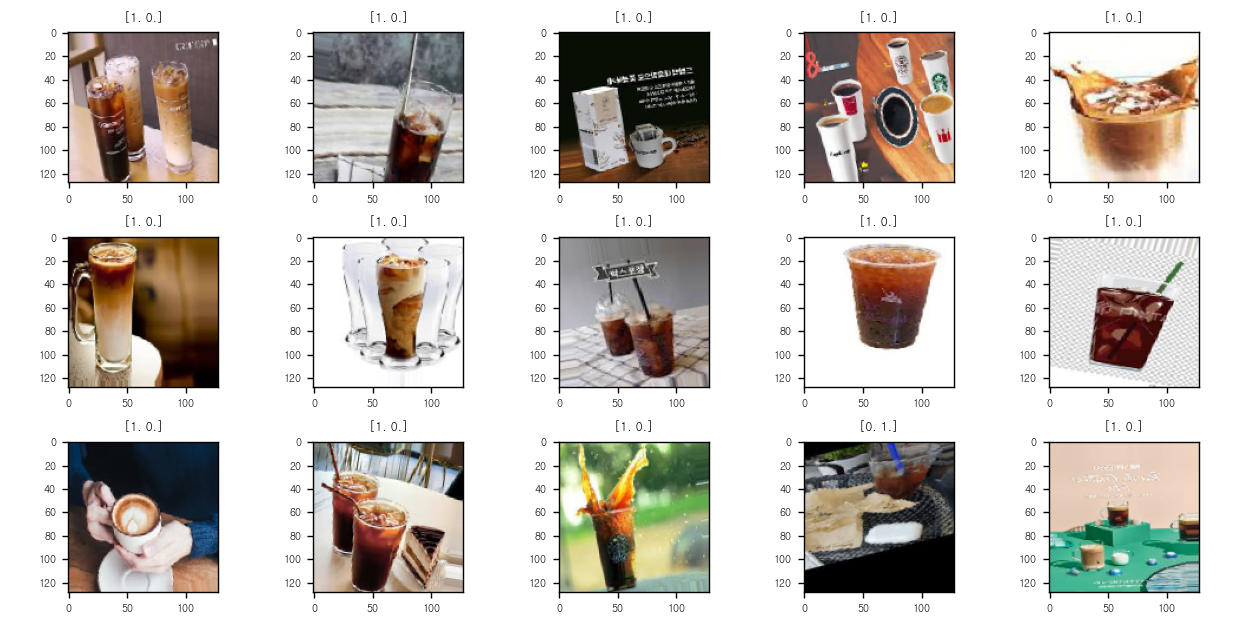

C:\Users\ailab0\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [125]:
%matplotlib notebook
plt.figure(figsize=(10,5))
for i in range(0,15):  # 15번 생성 
    plt.subplot(3,5,i+1) 
    for x, y in train_generator:
        #print(x[0])  # 컬러 이미지 3장으로 0~1 사이의 픽셀값 생성  
        #print(y[0])  # y[0]~ y14] 까지 사용가능  , 원핫인코딩 
        image = x[0] # 15번 중에서 임의의 x[0]~ x[14] 까지 사용가능         
        plt.imshow(image)
        plt.title(y[0])  # 15번 중에서 임의의 y[0]~ y[14] 까지 사용가능 , 원핫인코딩 
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:160%">  7.2) 준비된 validation 데이터셋을 기반으로 이미지 재생성하기 </span> 

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 1 : ImageDataGenerator 사용하기 </span> 

In [126]:
# 검증용 이미지 데이터 생성기 셋팅 (검증용은 원본 그대로 사용하고, rescale=1./255 정규화 처리만 수행)
validate_datagen=ImageDataGenerator(rescale=1./255)  #0~1 사이로 변경         

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 2 : flow_from_dataframe 사용하기 </span> 

In [127]:
#flow_from_dataframe 클래스 사용전 현재 검증용 데이터셋 상태 확인

print("-"*20, "validate_df", "-"*20)
print(validate_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(validate_df.filename)

print("-"*20, "label", "-"*20)
print(validate_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size) 

-------------------- validate_df --------------------
                   filename    label
0   spilled_coffee (16).jpg  spilled
1    spilled_coffee (5).jpg  spilled
2   normal_coffee (204).jpg   normal
3   normal_coffee (126).jpg   normal
4   spilled_coffee (23).jpg  spilled
..                      ...      ...
85   normal_coffee (79).jpg   normal
86   normal_coffee (73).jpg   normal
87  normal_coffee (380).jpg   normal
88  normal_coffee (150).jpg   normal
89  normal_coffee (248).jpg   normal

[90 rows x 2 columns]
-------------------- path --------------------
./coffee/training/
-------------------- filename --------------------
0     spilled_coffee (16).jpg
1      spilled_coffee (5).jpg
2     normal_coffee (204).jpg
3     normal_coffee (126).jpg
4     spilled_coffee (23).jpg
               ...           
85     normal_coffee (79).jpg
86     normal_coffee (73).jpg
87    normal_coffee (380).jpg
88    normal_coffee (150).jpg
89    normal_coffee (248).jpg
Name: filename, Length: 90, dtyp

In [129]:
validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "label",
    target_size = IMAGE_SIZE,
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size)

Found 90 validated image filenames belonging to 2 classes.


# validation 데이터셋에서 랜덤으로 15장을 재구성해서 출력해보기 

<IPython.core.display.Javascript object>


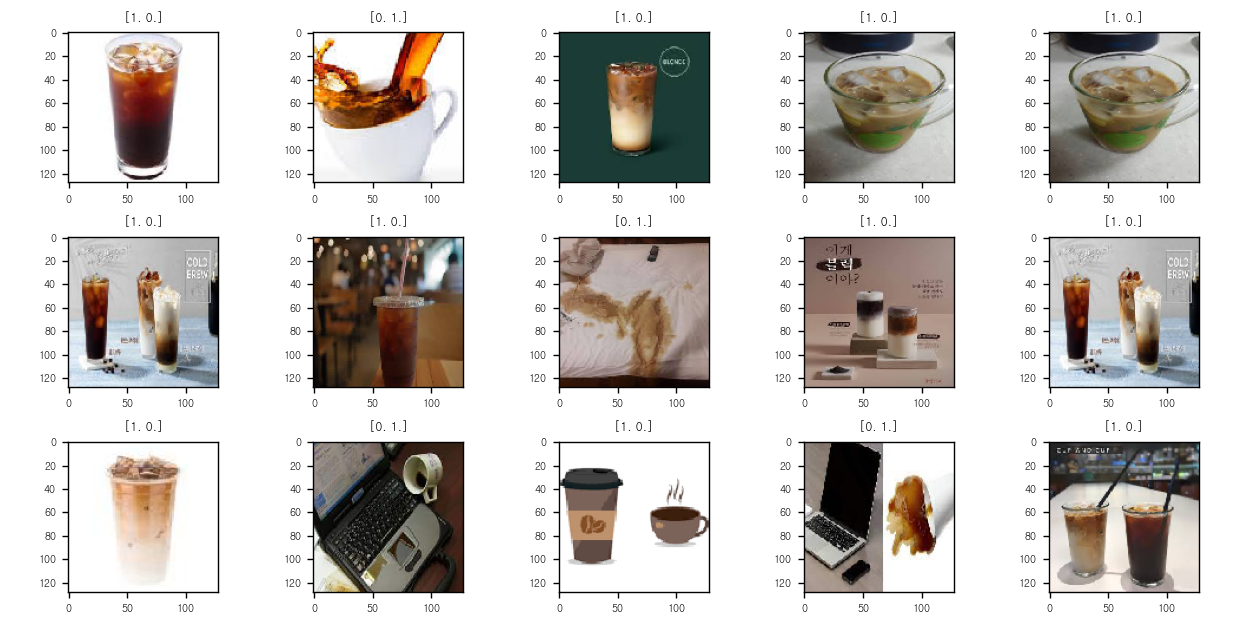

C:\Users\ailab0\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [130]:
%matplotlib notebook
plt.figure(figsize=(10,5))
for i in range(0,15):  # 15번 생성 
    plt.subplot(3,5,i+1) 
    for x, y in validation_generator:
        #print(x[0])  # 컬러 이미지 3장으로 0~1 사이의 픽셀값 생성 
        #print(y[0])  # y[0]~ y14] 까지 사용가능  , 원핫인코딩 
        image = x[0] # 15번 중에서 임의의 x[0]~ x[14] 까지 사용가능         
        plt.imshow(image)
        plt.title(y[0])  # 15번 중에서 임의의 y[0]~ y[14] 까지 사용가능 , 원핫인코딩 
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:160%">  7.3) training 데이터 중에서 랜덤으로 1개의 샘플 데이터 추출하여 이미지 재생성해보기 </span> 

# training 데이터 중에서 랜덤으로 1개의 샘플 데이터 추출하여 이미지 재생성해보기 

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 1 : 판다스 구조에서 임의의 이미지 1개 출력하기 </span> 

In [131]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,label
0,normal_coffee (371).jpg,normal


In [132]:
ex_df = example_df.iloc[[0],[0]]
ex_df

,filename
0,normal_coffee (371).jpg


In [133]:
ex_df = str(ex_df)
ex_df
len(ex_df)

53

In [134]:
ex_df

'                  filename\n0  normal_coffee (371).jpg'

In [137]:
ex = str(ex_df[-23:])
ex

'normal_coffee (371).jpg'

In [138]:
path

'./coffee/training/'

<IPython.core.display.Javascript object>


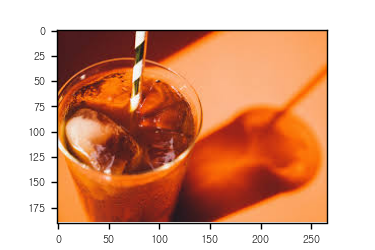

In [139]:
plt.figure(figsize=(3,2))
image = load_img(path+ex)
plt.imshow(image)

<span style="color:blue;  font-weight:bold; font-size:140%"> Step 2 : flow_from_dataframe 사용하기 </span> 

In [140]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "label",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


<IPython.core.display.Javascript object>


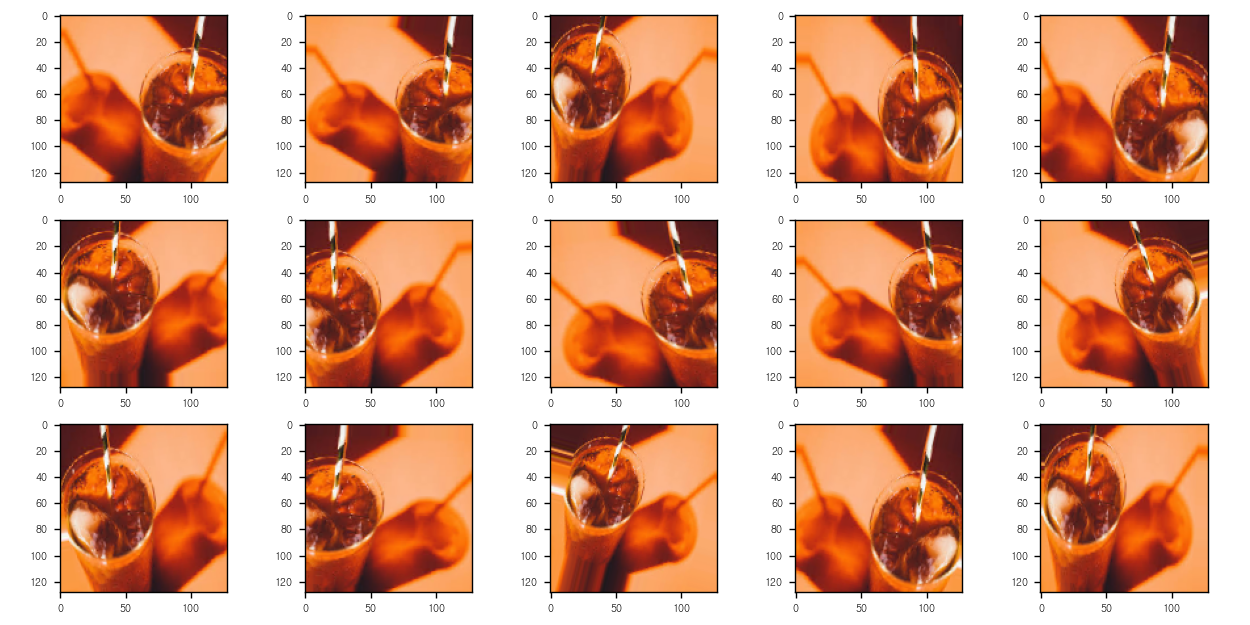

In [141]:
plt.figure(figsize=(10,5))
for i in range(0,15):
    plt.subplot(3,5,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:160%">  8)  fit_generator() 활용한 딥러닝 실행하기 </span> 

케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만    
제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용한다.  
이 경우, 용량 문제로 재생성된 이미지 파일을 따로 저장하지 않고 바로 fit_generator()사용하여 실행한다.  

ImageDataGenerator라는 제네레이터로 이미지를 담고 있는 배치로 학습시키기 때문에 fit_generator() 함수를 사용한다.

history = model.fit_generator(  
    train_generator,   
    epochs = epochs,   
    steps_per_epoch = total_train//batch_size ,  # total_train(1600개) / batch_size(15개) = 106.6666   
    validation_data=  validation_generator,  
    validation_steps = total_validate//batch_size,  # total_validate(400개) / batch_size(15개) = 26.6666  
    callbacks = callbacks,  
)

train_generator : 훈련데이터셋을 제공할 제네레이터를 지정 
epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정  
steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정 total_train(1600개) / batch_size(15개) = 106.6666 
                  제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지에 해당한다. 

validation_data : 검증데이터셋을 제공할 제네레이터를 지정    
validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수  # total_validate(400개) / batch_size(15개) = 26.6666  
                   제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지에 해당한다. 

In [146]:
epochs = 50

history = model.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,  
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,  
    callbacks = callbacks,  #콜백함수 사용 
)

# 모델 저장 
model.save_weights("model.h5")

Epoch 1/50
23/24 [===========================>..] - ETA: 0s - loss: 1.3025 - accuracy: 0.5739
Epoch 00001: val_loss improved from inf to 0.92273, saving model to ./coffee_model_save/01-1.2702.hdf5
24/24 [==============================] - 12s 511ms/step - loss: 1.2702 - accuracy: 0.5806 - val_loss: 0.9227 - val_accuracy: 0.8667
Epoch 2/50
23/24 [===========================>..] - ETA: 0s - loss: 0.7119 - accuracy: 0.7101
Epoch 00002: val_loss did not improve from 0.92273
24/24 [==============================] - 12s 481ms/step - loss: 0.7202 - accuracy: 0.7083 - val_loss: 2.1491 - val_accuracy: 0.8667
Epoch 3/50
23/24 [===========================>..] - ETA: 0s - loss: 0.5503 - accuracy: 0.7536
Epoch 00003: val_loss did not improve from 0.92273

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
24/24 [==============================] - 12s 490ms/step - loss: 0.5410 - accuracy: 0.7556 - val_loss: 2.1491 - val_accuracy: 0.8667
Epoch 4/50
23/24 [==================

Epoch 28/50
23/24 [===========================>..] - ETA: 0s - loss: 0.2545 - accuracy: 0.9130
Epoch 00028: val_loss did not improve from 0.43018
24/24 [==============================] - 12s 482ms/step - loss: 0.2609 - accuracy: 0.9111 - val_loss: 0.4304 - val_accuracy: 0.8444
Epoch 29/50
23/24 [===========================>..] - ETA: 0s - loss: 0.2255 - accuracy: 0.9159
Epoch 00029: val_loss did not improve from 0.43018
24/24 [==============================] - 12s 486ms/step - loss: 0.2248 - accuracy: 0.9167 - val_loss: 0.6434 - val_accuracy: 0.7667
Epoch 30/50
23/24 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.9101
Epoch 00030: val_loss did not improve from 0.43018
24/24 [==============================] - 12s 481ms/step - loss: 0.2415 - accuracy: 0.9111 - val_loss: 0.7489 - val_accuracy: 0.7444
Epoch 31/50
23/24 [===========================>..] - ETA: 0s - loss: 0.2452 - accuracy: 0.9101
Epoch 00031: val_loss did not improve from 0.43018
24/24 [=============

<span style="color:blue;  font-weight:bold; font-size:160%">  9)  딥러닝 결과 시각화하기  </span> 

<IPython.core.display.Javascript object>


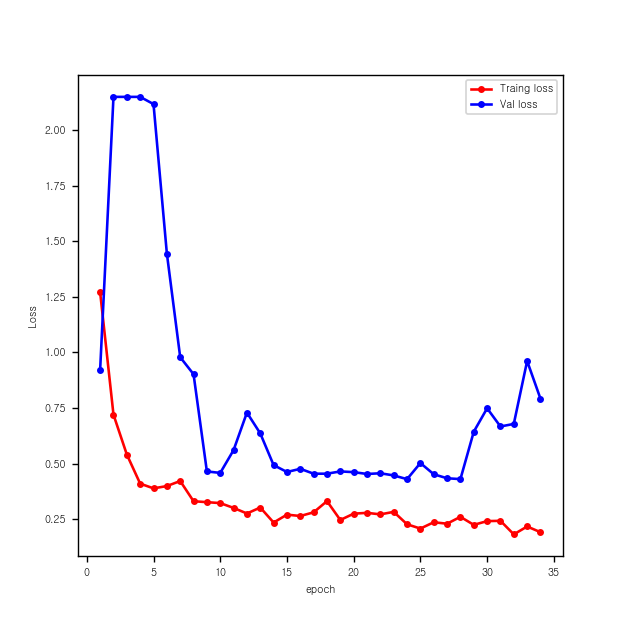

In [147]:
historyDict=history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(5,5))
epo = range(1, len(acc)+1)
plt.plot(epo, loss, marker='.', color='red', label="Traing loss")
plt.plot(epo, val_loss, marker='.', color='blue', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


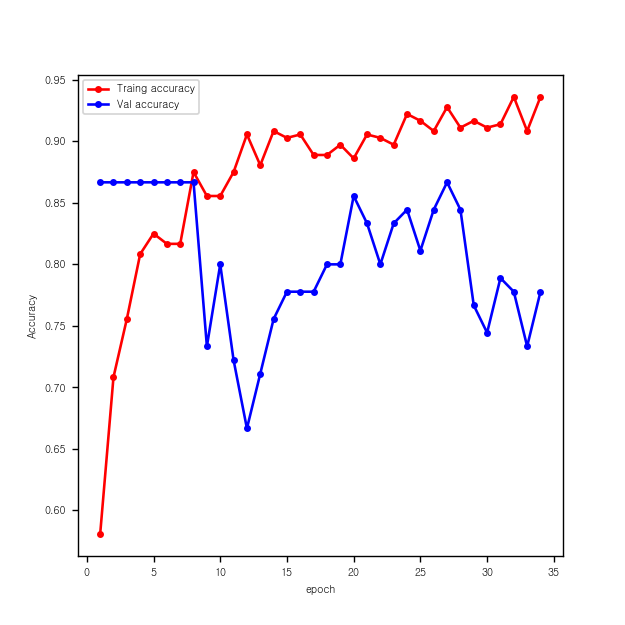

In [148]:
plt.figure(figsize=(5,5))
plt.plot(epo, acc, marker='.', color='red',  label="Traing accuracy")
plt.plot(epo, val_acc, marker='.', color='blue',  label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:160%">  10) 이미지 테스트 데이터셋 증식하기  </span> 

## 준비된 이미지 테스트 데이터셋 

In [149]:
os.getcwd()

'C:\\ai\\CNN_CATS_AND_DOGS'

In [188]:
test_path = './coffee/training/'

In [189]:
filenames = os.listdir(test_path )
print("●len(filenames) :", len(filenames)) 
#print(filenames) 

●len(filenames) : 450


In [190]:
# 테스트 데이터 준비 
test_df=pd.DataFrame( {"filename":filenames} )

In [191]:
test_df

,filename
0,normal_coffee (1).jpg
1,normal_coffee (10).jpg
2,normal_coffee (100).jpg
3,normal_coffee (101).jpg
4,normal_coffee (102).jpg
...,...
445,spilled_coffee (50).jpg
446,spilled_coffee (6).jpg
447,spilled_coffee (7).jpg
448,spilled_coffee (8).jpg


In [192]:
test_df.shape

(450, 1)

In [193]:
test_len=test_df.shape[0]

In [194]:
test_len

450

<IPython.core.display.Javascript object>


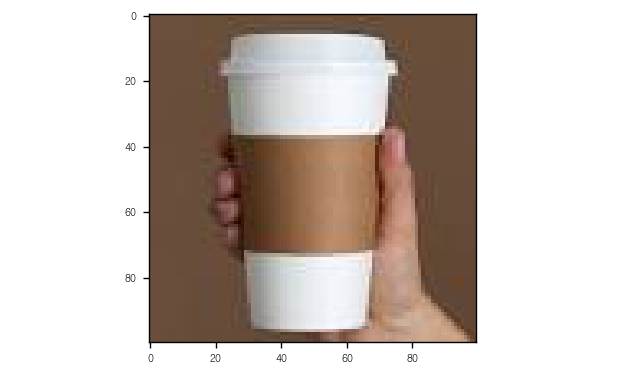

In [196]:
image = load_img(test_path+sample)
plt.figure(figsize=(5,3))
plt.imshow(image)
plt.tight_layout()
plt.show()

## 테스트 이미지 증식을 위한 부분 

In [164]:
batch_size

15

In [165]:
#방식 2
# 테스트 이미지 변경하여 사용 
test_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [166]:
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    test_path,
    x_col= "filename",
    y_col= None,
    target_size = IMAGE_SIZE,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 450 validated image filenames.


In [167]:
predict=model.predict_generator(test_generator,                                 
                                callbacks=callbacks)

In [168]:
print("테스트 이미지 개수 : ", len(predict))
print("테스트 결과  ")
print(predict)

테스트 이미지 개수 :  450
테스트 결과  
[[9.76254582e-01 2.37454847e-02]
 [9.86754477e-01 1.32455388e-02]
 [8.66021216e-01 1.33978754e-01]
 [8.85388315e-01 1.14611745e-01]
 [9.87410367e-01 1.25896493e-02]
 [9.97391343e-01 2.60864338e-03]
 [9.99726951e-01 2.73061683e-04]
 [4.21116829e-01 5.78883111e-01]
 [9.66154993e-01 3.38449851e-02]
 [6.72961593e-01 3.27038467e-01]
 [1.00000000e+00 5.07063975e-14]
 [8.72429967e-01 1.27570003e-01]
 [1.51409651e-04 9.99848604e-01]
 [8.39206040e-01 1.60793915e-01]
 [9.80710030e-01 1.92899592e-02]
 [3.29880267e-01 6.70119703e-01]
 [9.99789059e-01 2.10962084e-04]
 [9.50571179e-01 4.94288467e-02]
 [2.21043497e-01 7.78956473e-01]
 [9.99999642e-01 3.29656643e-07]
 [9.68152285e-01 3.18477266e-02]
 [7.19753206e-01 2.80246794e-01]
 [9.66498554e-01 3.35015208e-02]
 [4.34491336e-01 5.65508604e-01]
 [9.86039758e-01 1.39602851e-02]
 [9.99992609e-01 7.39271491e-06]
 [9.99999762e-01 2.29971377e-07]
 [9.98577237e-01 1.42270443e-03]
 [9.26030457e-01 7.39695430e-02]
 [1.06631421e-01

In [169]:
result = np.argmax(predict, axis=1)

In [170]:
for i in range (len(predict)):
    
    if result[i] == 0 : 
        print(i+1, "번째 이미지 예측 결과 : ", result[i], ", cat") 
    else :
        print(i+1, "번째 이미지 예측 결과 : ", result[i], ", dog")    

1 번째 이미지 예측 결과 :  0 , cat
2 번째 이미지 예측 결과 :  0 , cat
3 번째 이미지 예측 결과 :  0 , cat
4 번째 이미지 예측 결과 :  0 , cat
5 번째 이미지 예측 결과 :  0 , cat
6 번째 이미지 예측 결과 :  0 , cat
7 번째 이미지 예측 결과 :  0 , cat
8 번째 이미지 예측 결과 :  1 , dog
9 번째 이미지 예측 결과 :  0 , cat
10 번째 이미지 예측 결과 :  0 , cat
11 번째 이미지 예측 결과 :  0 , cat
12 번째 이미지 예측 결과 :  0 , cat
13 번째 이미지 예측 결과 :  1 , dog
14 번째 이미지 예측 결과 :  0 , cat
15 번째 이미지 예측 결과 :  0 , cat
16 번째 이미지 예측 결과 :  1 , dog
17 번째 이미지 예측 결과 :  0 , cat
18 번째 이미지 예측 결과 :  0 , cat
19 번째 이미지 예측 결과 :  1 , dog
20 번째 이미지 예측 결과 :  0 , cat
21 번째 이미지 예측 결과 :  0 , cat
22 번째 이미지 예측 결과 :  0 , cat
23 번째 이미지 예측 결과 :  0 , cat
24 번째 이미지 예측 결과 :  1 , dog
25 번째 이미지 예측 결과 :  0 , cat
26 번째 이미지 예측 결과 :  0 , cat
27 번째 이미지 예측 결과 :  0 , cat
28 번째 이미지 예측 결과 :  0 , cat
29 번째 이미지 예측 결과 :  0 , cat
30 번째 이미지 예측 결과 :  1 , dog
31 번째 이미지 예측 결과 :  0 , cat
32 번째 이미지 예측 결과 :  0 , cat
33 번째 이미지 예측 결과 :  0 , cat
34 번째 이미지 예측 결과 :  0 , cat
35 번째 이미지 예측 결과 :  0 , cat
36 번째 이미지 예측 결과 :  1 , dog
37 번째 이미지 예측 결과 :  0 , cat
38 번째 이미지 

# 이미지 인식 테스트 

In [171]:
print(test_len)
print(batch_size)

450
15


In [172]:
predict=model.predict_generator(test_generator,     
                                steps=10, 
                                callbacks=callbacks)

In [173]:
print("테스트 이미지 개수 : ", len(predict))
print("테스트 결과  ")
print(predict)

테스트 이미지 개수 :  150
테스트 결과  
[[8.32565606e-01 1.67434379e-01]
 [8.62990022e-01 1.37009948e-01]
 [8.26228738e-01 1.73771203e-01]
 [9.98989880e-01 1.01013388e-03]
 [9.98681843e-01 1.31815998e-03]
 [9.97082412e-01 2.91755516e-03]
 [9.43895400e-01 5.61045483e-02]
 [3.28650683e-01 6.71349287e-01]
 [9.99348938e-01 6.51061884e-04]
 [7.99717724e-01 2.00282261e-01]
 [9.99999285e-01 7.06143624e-07]
 [8.34440708e-01 1.65559322e-01]
 [6.03780732e-04 9.99396205e-01]
 [8.66867185e-01 1.33132756e-01]
 [9.92556393e-01 7.44366506e-03]
 [9.52147365e-01 4.78526466e-02]
 [9.73378360e-01 2.66215596e-02]
 [9.06796813e-01 9.32031199e-02]
 [7.33171225e-01 2.66828805e-01]
 [9.99999642e-01 3.65814742e-07]
 [9.99931097e-01 6.88819273e-05]
 [1.54571868e-02 9.84542787e-01]
 [7.53153801e-01 2.46846199e-01]
 [6.35698318e-01 3.64301652e-01]
 [9.82626975e-01 1.73730273e-02]
 [9.98123586e-01 1.87637110e-03]
 [9.99999881e-01 9.94241276e-08]
 [9.99998927e-01 1.10716906e-06]
 [9.27822471e-01 7.21775740e-02]
 [9.80475843e-01

In [174]:
result = np.argmax(predict, axis=1)

In [175]:
result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [176]:
for i in range (len(predict)):    
    if result[i] == 0 : 
        print(i+1, "번째 이미지 예측 결과 : ", result[i], ", cat") 
    else :
        print(i+1, "번째 이미지 예측 결과 : ", result[i], ", dog")   

1 번째 이미지 예측 결과 :  0 , cat
2 번째 이미지 예측 결과 :  0 , cat
3 번째 이미지 예측 결과 :  0 , cat
4 번째 이미지 예측 결과 :  0 , cat
5 번째 이미지 예측 결과 :  0 , cat
6 번째 이미지 예측 결과 :  0 , cat
7 번째 이미지 예측 결과 :  0 , cat
8 번째 이미지 예측 결과 :  1 , dog
9 번째 이미지 예측 결과 :  0 , cat
10 번째 이미지 예측 결과 :  0 , cat
11 번째 이미지 예측 결과 :  0 , cat
12 번째 이미지 예측 결과 :  0 , cat
13 번째 이미지 예측 결과 :  1 , dog
14 번째 이미지 예측 결과 :  0 , cat
15 번째 이미지 예측 결과 :  0 , cat
16 번째 이미지 예측 결과 :  0 , cat
17 번째 이미지 예측 결과 :  0 , cat
18 번째 이미지 예측 결과 :  0 , cat
19 번째 이미지 예측 결과 :  0 , cat
20 번째 이미지 예측 결과 :  0 , cat
21 번째 이미지 예측 결과 :  0 , cat
22 번째 이미지 예측 결과 :  1 , dog
23 번째 이미지 예측 결과 :  0 , cat
24 번째 이미지 예측 결과 :  0 , cat
25 번째 이미지 예측 결과 :  0 , cat
26 번째 이미지 예측 결과 :  0 , cat
27 번째 이미지 예측 결과 :  0 , cat
28 번째 이미지 예측 결과 :  0 , cat
29 번째 이미지 예측 결과 :  0 , cat
30 번째 이미지 예측 결과 :  0 , cat
31 번째 이미지 예측 결과 :  0 , cat
32 번째 이미지 예측 결과 :  0 , cat
33 번째 이미지 예측 결과 :  0 , cat
34 번째 이미지 예측 결과 :  0 , cat
35 번째 이미지 예측 결과 :  0 , cat
36 번째 이미지 예측 결과 :  0 , cat
37 번째 이미지 예측 결과 :  0 , cat
38 번째 이미지 

# 테스트 이미지 출력해보기 

In [177]:
predict=model.predict_generator(test_generator, 
                                callbacks=callbacks)
                                
test_df['category']=np.argmax(predict, axis=1)

In [178]:
test_df

,filename,category
0,normal_coffee (1).jpg,0
1,normal_coffee (10).jpg,0
2,normal_coffee (100).jpg,0
3,normal_coffee (101).jpg,0
4,normal_coffee (102).jpg,0
...,...,...
445,spilled_coffee (50).jpg,0
446,spilled_coffee (6).jpg,1
447,spilled_coffee (7).jpg,0
448,spilled_coffee (8).jpg,1


In [179]:
test_df['category']=test_df['category'].replace({0:'cat',1:"dog"})
pred_df=test_df.sample(n=1).reset_index(drop=True)
pred_df

,filename,category
0,normal_coffee (187).jpg,cat


In [180]:
test_sample=list(pred_df.filename)
print(test_sample)

['normal_coffee (187).jpg']


In [181]:
type(test_sample)

list

In [182]:
sample = ""
for test in test_sample:
    sample += test

In [183]:
sample   #테스트 샘플 파일명 출력 

'normal_coffee (187).jpg'

In [184]:
type(sample)

str

In [185]:
test_path

'./coffee/training'